In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('male-elephant-tusk-size.csv')

- Utilize the model to calculate the tusk length for `pre-poaching` elephants with a shoulder height of 250 cm.

Tusk length for 250cm of shoulder heigh : 117.55 cm.


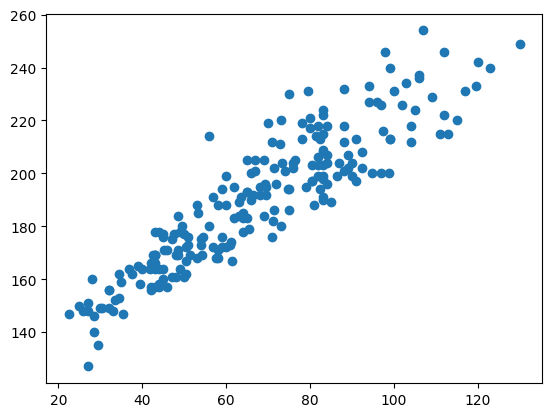

In [2]:
# Create the model of prediction
from sklearn.linear_model import LinearRegression

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
    
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_

    def predict(self, x):
        return self.slope * x + self.intercept
    
# Pre-poaching 19966-1968
pre_poaching = df.query('period == "1966-68"')

plt.scatter(pre_poaching['tusk_length'], pre_poaching['shoulder_height'])

pre_model = LinearModel('pre_poaching')
pre_model.fit(x=pre_poaching['shoulder_height'], y=pre_poaching['tusk_length'])
print(f'Tusk length for 250cm of shoulder heigh : {round(pre_model.predict(x=250), 2)} cm.')

 - Perform the same calculation for `post-recovery` elephants with the same shoulder height.

The tusk length for post period for a shoulder height of 250cm is : 78.67 cm.


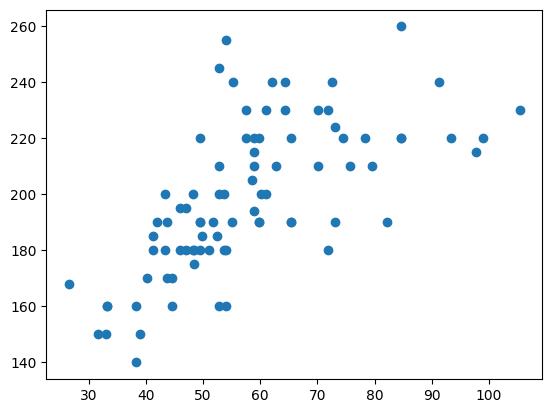

In [4]:
post_recovery = df.query('period == "2005-13"')
plt.scatter(post_recovery['tusk_length'], post_recovery['shoulder_height'])

post_model = LinearModel('post_model')
post_model.fit(x=post_recovery['shoulder_height'], y=post_recovery['tusk_length'])
print(f'The tusk length for post period for a shoulder height of 250cm is : {round(post_model.predict(x=250), 2)} cm.')

- Calculate how much longer, in percentage, the tusks of `pre-poaching` elephants are compared to `post-recovery` elephants with a 250 cm shoulder height.

In [11]:
# Length of tusk for 250cm shoulder height
length_pre = pre_model.predict(x=250)
length_post = post_model.predict(x=250)
percentage_longer = ((length_pre - length_post) / length_post) * 100

print(round(percentage_longer, 2))

49.42


2. Taller Elephants
   - Elephants can reach shoulder heights of up to 400 cm. Use the model to predict the tusk length for elephants of this height in both the `pre_poaching` and `post_recovery` cohorts.

In [15]:
predict_400_pre = pre_model.predict(x=400)
predict_400_post = post_model.predict(x=400)

print(f'Length of tusk for 400cm shoulder height in pre-poaching : {round(predict_400_pre, 2)} cm.')
print(f'Length of tusk for 400cm shoulder height in post-poaching : {round(predict_400_post, 2)} cm.')

Length of tusk for 400cm shoulder height in pre-poaching : 242.76 cm.
Length of tusk for 400cm shoulder height in post-poaching : 139.08 cm.
